## Problem Definition

*Recognize handwritten digits*
![](imgs/mnist.png)






## Data

The MNIST database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. 

The training set has $60,000$ samples. 

The test set has $10,000$ samples.

The digits are size-normalized and centered in a fixed-size image. 

The data page has description on how the data was collected. It also has reports the benchmark of various algorithms on the test dataset. 

## Load Data

In [3]:


from __future__ import print_function
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.datasets import mnist
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from matplotlib import pyplot
from scipy.misc import imread, imresize
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalization of data    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Display Images
Let's now display some of the images and see how they look
![](imgs/Full_class_mnist.JPG)

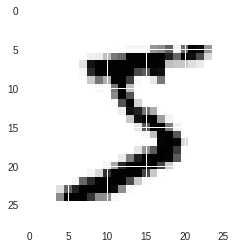

In [5]:
plt.imshow(x_train[0].reshape(28, 28))

In [5]:
print(np.asarray(range(10)))
print(y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


### Define Model

In [0]:
input_shape=x_train[1].shape
X_input = Input(input_shape)
X=ZeroPadding2D((3,3))(X_input)
X=Conv2D(32,(3,3),strides=(1,1),activation='relu',name='con0')(X)
X=MaxPooling2D((2,2),name='max_pooling1')(X)
X=Dropout(0.25)(X)
X=Conv2D(64,(3,3),strides=(1,1),activation='relu',name='con1')(X)
X=MaxPooling2D((2,2),name='max_pooling2')(X)
X=Dropout(0.5)(X)
X=Flatten()(X)
X = Dense(num_classes, activation='softmax',name='fc1')(X)
mnist_model=Model(inputs=X_input,name='mnist_model',outputs=X)

In [46]:
mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 34, 34, 1)         0         
_________________________________________________________________
con0 (Conv2D)                (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
con1 (Conv2D)                (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
__________

In [48]:
#Compile
mnist_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#training
history=mnist_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0651 - acc: 0.9807 - val_loss: 0.0314 - val_acc: 0.9900
Epoch 2/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.0582 - acc: 0.9829 - val_loss: 0.0297 - val_acc: 0.9906
Epoch 3/12
57088/60000 [===========================>..] - ETA: 0s - loss: 0.0534 - acc: 0.983960000/60000 [==============================] - 8s 126us/step - loss: 0.0540 - acc: 0.9836 - val_loss: 0.0291 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0516 - acc: 0.9837 - val_loss: 0.0287 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.0509 - acc: 0.9844 - val_loss: 0.0278 - val_acc: 0.9907
Epoch 6/12
28928/60000 [=============>................] - ETA: 3s - loss: 0.0481 - acc: 0.985660000/60000 [==============================] - 8s 127us/step - loss: 0.0490 - acc: 

In [49]:
#Evalulate
score = mnist_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Test Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.026220980392571074
Test accuracy: 0.9913
Test Error: 0.87%


In [0]:
plot_model(mnist_model, to_file='mnist_model.png')
SVG(model_to_dot(mnist_model).create(prog='dot', format='svg'))

<img src="imgs/mnist_model.png" width="40%">

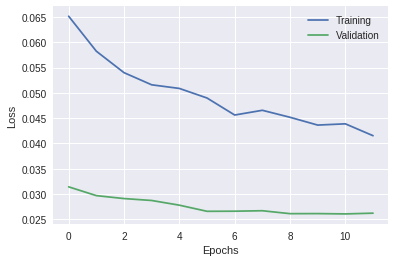

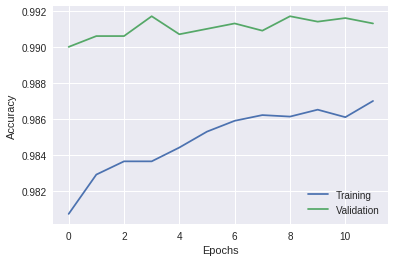

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(history)

y= 4


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


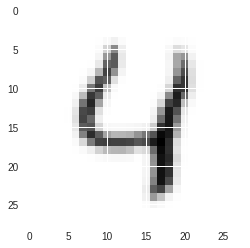

In [56]:
#predict
x = imread('digit_minst.png',mode='L')
#compute a bit-wise inversion so black becomes white and vice versa
x = np.invert(x)
#make it the right size
x = imresize(x,(28,28))
pyplot.imshow(x)
#convert to a 4D tensor to feed into our model
x = x.reshape(1,28,28,1)
x = x.astype('float32')
x /= 255

#perform the prediction
out = mnist_model.predict(x)
print('y=',np.argmax(out))

## Save Model
You can use model.save(filepath) to save a Keras model into a single HDF5 file which will contain:

    the architecture of the model, allowing to re-create the model
    the weights of the model
    the training configuration (loss, optimizer)
    the state of the optimizer, allowing to resume training exactly where you left off.

You can then use keras.models.load_model(filepath) to reinstantiate your model. load_model will also take care of compiling the model using the saved training configuration (unless the model was never compiled in the first place).

In [0]:
from keras.models import load_model

mnist_model.save('my_mnist_model.h5')  # creates a HDF5 file 'my_model.h5'
del mnist_model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_mnist_model.h5')